In [688]:
#import sys
#!{sys.executable} -m pip install statsmodels

In [689]:
import function
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, t

from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Normalizer, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.graph_objs as go
from ipywidgets import *
from importlib import reload


In [690]:
df = pd.read_csv("soMuchWorkIHadToDrinkOneBeer.csv" )
Y = df["review_overall"]

print(df.shape)
print(df.columns)

function = reload(function)


(3197, 25)
Index(['Name', 'Style', 'Brewery', 'Beer Name (Full)', 'Description', 'ABV',
       'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')


## task 1 : Separate arbitrarily a small subset of observations from the dataset

## task 2: Formulating an objective

the objective with this dataset is to be able to predict the "review_overall" of a element 

we could also try to determine what factors have the most impact on a score and give feedback to improve a beer based on it's attributes :

Here is an outline of the process:

    -Collect a labeled dataset, where each entry is associated with a score and its attributes.
    -Preprocess the data, including splitting it into training and testing sets.
    -Train a model on the training set, using a supervised learning algorithm such as linear regression, decision tree, or random forest.
    -Test the model on the testing set and evaluate its performance.
    -Use the trained model to predict the score for a new entry with the attributes you want to change.
    -Modify the attributes of the new entry and re-predict the score using the trained model.
    -Compare the scores obtained before and after modifying the attributes to determine which attribute changes lead to an improvement in the score.

It's worth noting that this process assumes that the relationship between the attributes and the score is linear or can be approximated by a linear model. If this is not the case, you may need to use a more complex model or consider other approaches to identify the attribute changes that lead to an improvement in the score.

## task 3: Descriptive analysis 

| - informative variables: | - Qualitative variables:   | - Quantitative variable: | - Scores: |
|------|------|------|------|
|   1 Name |1 Style|1 ABV|1 review_aroma
|2 Full Name |2 brewery|2 Min IBU|2 review_appearance
|3 description  | | 3 Max IBU|3 review_palate
| | |4 Astringency|4 review_taste
| | |5 Body|///////////////////////////////////|
| | |6 Alcohol|5 review_overall
| | |7 Bitter|
| | |8 Sweet|
| | |9 Sour|
| | |10 Salty|
| | |11 Fruits|
| | |12 Hoppy|
| | |13 Spices|
| | |14 Malty| 


The informative variables don't give a lot of information about the score that are not already presents in the other variables. Therefore they wont be used 

The qualitative variables will be one-hot encoded to be treated as Quantitative variables 

The Quantitative variables will be used as his 

the scores will be used as target for the model 

| name              |      mean |        std |   skewness |   kurtosis |
|:------------------|----------:|-----------:|-----------:|-----------:|
| Style             |  55.5705  |  32.3737   | -0.0196824 |  -1.18762  |
| Brewery           | 296.225   | 169.184    | -0.178968  |  -1.2789   |
| ABV               |   6.52669 |   2.547    |  3.67993   |  55.2444   |
| Min IBU           |  21.1805  |  13.2422   |  1.09326   |   1.32465  |
| Max IBU           |  38.9869  |  21.3553   |  0.99054   |   0.977638 |
| Astringency       |  16.5158  |  10.4107   |  1.31567   |   2.7722   |
| Body              |  46.1295  |  25.9478   |  1.14028   |   1.61526  |
| Alcohol           |  17.056   |  17.3313   |  2.23306   |   6.28596  |
| Bitter            |  36.3644  |  25.7912   |  1.00606   |   0.938633 |
| Sweet             |  58.2709  |  34.2813   |  0.905323  |   1.31787  |
| Sour              |  33.1454  |  35.7802   |  2.52257   |   7.85566  |
| Salty             |   1.0172  |   2.13265  |  7.53925   | 115.175    |
| Fruits            |  38.5296  |  32.2966   |  0.944666  |   0.220681 |
| Hoppy             |  40.9246  |  30.4036   |  1.10125   |   0.909249 |
| Spices            |  18.3456  |  23.7566   |  2.89396   |  10.4379   |
| Malty             |  75.3309  |  39.9093   |  0.382408  |  -0.195185 |
| review_aroma      |   3.63879 |   0.503209 | -1.09663   |   1.739    |
| review_appearance |   3.75439 |   0.403416 | -1.41173   |   2.90485  |
| review_palate     |   3.66043 |   0.449937 | -1.19533   |   2.19325  |
| review_taste      |   3.7025  |   0.510361 | -1.15676   |   1.9346   |
| review_overall    |   3.74752 |   0.444288 | -1.31737   |   2.72505  |
| number_of_reviews | 233.285   | 361.812    |  3.02845   |  11.8498   |

In [691]:

def describe_columns(dataset):
    # create an empty dataframe to store the results
    results = pd.DataFrame(columns=["name",'mean', 'std', 'skewness', 'kurtosis'])
    
    # iterate over each column in the dataset
    for col in dataset.columns:

        if (dataset[col].dtypes == float or dataset[col].dtypes == np.int64):
        # calculate the mean, standard deviation, skewness, and kurtosis
            
            mean = dataset[col].mean()
            std = dataset[col].std()
            skewness = skew(dataset[col])
            kurt = kurtosis(dataset[col])
            results.loc[col] = [ col, mean, std, skewness, kurt]

       
        
    return results

"""def set_to_nan(df , name):
    counts = df[name].value_counts()
    to_replace = counts[counts == 1].index

    # Replace these elements with NaN
    df[name].replace(to_replace, np.nan, inplace=True)"""


'def set_to_nan(df , name):\n    counts = df[name].value_counts()\n    to_replace = counts[counts == 1].index\n\n    # Replace these elements with NaN\n    df[name].replace(to_replace, np.nan, inplace=True)'

In [692]:
nbr_style = df['Style'].nunique()
print(nbr_style)
nbr_brewery = df['Brewery'].nunique()
print(nbr_brewery)

11
934


In [693]:
table = describe_columns(df)
print(len(table))
markdown_table = table.to_markdown(index=False)
print(markdown_table)

20
| name              |      mean |        std |   skewness |   kurtosis |
|:------------------|----------:|-----------:|-----------:|-----------:|
| ABV               |   6.52669 |   2.547    |   3.67993  |  55.2444   |
| Min IBU           |  21.1805  |  13.2422   |   1.09326  |   1.32465  |
| Max IBU           |  38.9869  |  21.3553   |   0.99054  |   0.977638 |
| Astringency       |  16.5158  |  10.4107   |   1.31567  |   2.7722   |
| Body              |  46.1295  |  25.9478   |   1.14028  |   1.61526  |
| Alcohol           |  17.056   |  17.3313   |   2.23306  |   6.28596  |
| Bitter            |  36.3644  |  25.7912   |   1.00606  |   0.938633 |
| Sweet             |  58.2709  |  34.2813   |   0.905323 |   1.31787  |
| Sour              |  33.1454  |  35.7802   |   2.52257  |   7.85566  |
| Salty             |   1.0172  |   2.13265  |   7.53925  | 115.175    |
| Fruits            |  38.5296  |  32.2966   |   0.944666 |   0.220681 |
| Hoppy             |  40.9246  |  30.4036   |  

In [694]:
dfcorr = df.drop(["Name", "Beer Name (Full)","Description"], axis=1)
print(dfcorr.shape)

corr = dfcorr.corr()

# Use the seaborn library to create a heat map of the correlations
fig = px.imshow(corr, title="Correlation Heat Map")
fig.show()

(3197, 22)


In [695]:

function.InteractiveBoxPlot(dfcorr)



    'data': [{'type': 'box',
              'uid': '2c8d4305-0143-4a83-adcb-a5089…

### Standardization

In [696]:
df_quant = dfcorr.select_dtypes(include=['float64', 'int64'])
df_qual = dfcorr.select_dtypes(include=['object'])

df_standarized = (df_quant - df_quant.mean()) / df_quant.std()


dfcorr_standarized = pd.concat([df_standarized, df_qual], axis=1)
print(dfcorr_standarized.shape)
print(dfcorr_standarized.columns)

(3197, 22)
Index(['ABV', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews', 'Style', 'Brewery'],
      dtype='object')


### Dummies

In [697]:
print(dfcorr_standarized.shape)

# Takes the 10 most frequent breweries
most_frequents = dfcorr_standarized['Brewery'].value_counts().index[:10]

dummies = pd.DataFrame(np.zeros((len(dfcorr_standarized), len(most_frequents))), columns=most_frequents)
print(dummies.shape)
# Set the dummy variables to 1 if the brewery is in the most frequent breweries
for i, brewery in enumerate(dfcorr_standarized['Brewery'].values):
    if brewery in most_frequents:
        dummies.loc[i, brewery] = 1

dfcorr_standarized = pd.concat([dfcorr_standarized, dummies], axis=1)
dfcorr_standarized = dfcorr_standarized.drop('Brewery', axis=1)
print(dfcorr_standarized.shape)

# 11 - 1 = 10
dfcorr_standarized = pd.get_dummies(dfcorr_standarized, columns=['Style'], drop_first=True,prefix='Style', prefix_sep='_')



(3197, 22)
(3197, 10)
(3197, 31)


In [698]:
# 22 + (10 - 1) + (11 - 1) - 1
print(dfcorr_standarized.shape)
print(dfcorr_standarized.columns)

(3197, 40)
Index(['ABV', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews',
       'Boston Beer Company (Samuel Adams)', 'Dogfish Head Brewery',
       'Anheuser-Busch', 'Three Floyds Brewing Co. & Brewpub',
       'Victory Brewing Company', 'Rogue Ales', 'Matt Brewing Company',
       'Short's Brewing Company', 'Great Divide Brewing Company',
       'Russian River Brewing Company', 'Style_Bock', 'Style_Brett',
       'Style_Brown Ale', 'Style_Brut', 'Style_IPA', 'Style_Lambic',
       'Style_Sour', 'Style_Trappist beer', 'Style_dark', 'Style_lager'],
      dtype='object')


## task 4

### nonlinearity

In [699]:
#function.InteractiveScatter(dfcorr , df)

In [700]:
print(dfcorr["review_overall"])

0       1.471154
1       1.857143
2       1.957602
3       2.071429
4       2.159656
          ...   
3192    4.750000
3193    4.500000
3194    4.500000
3195    4.500000
3196    4.500000
Name: review_overall, Length: 3197, dtype: float64


In [701]:
dfcorr_standarized = dfcorr_standarized.drop("review_overall", axis=1)

X_train, X_test, y_train, y_test = train_test_split(dfcorr_standarized, Y, test_size=0.2)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [702]:
print(X_train.shape)

(2557, 40)


In [703]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     737.5
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:38:48   Log-Likelihood:                 1673.9
No. Observations:                2557   AIC:                            -3268.
Df Residuals:                    2517   BIC:                            -3034.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Multicollinearity

In [704]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data into a pandas DataFrame
X = X_train.values

# Convert the DataFrame to a matrix

# Compute the VIF for each column
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Print the VIF for each column
print(vif)

features_col = []
for i in range(len(vif)):
    if vif[i] > 10:
        features_col.append(i)

colum_name = X_train.columns[features_col]
print(colum_name)

[48.726973259824014, 2.8457174452248832, 4.4629323940826, 4.522871934188371, 2.24008618480949, 3.619041052692769, 2.3843073570493853, 5.508095384590832, 3.3644115741137632, 4.422228470128006, 1.1860629090137467, 4.7218407801440545, 3.568748714813352, 1.3487006612263028, 4.280581969251545, 10.975793574564626, 5.216920107685596, 11.569254020489643, 14.336351952502515, 1.279109284013259, 1.0626396831909672, 1.074093317123195, 1.1533432837725488, 1.0237343100986744, 1.0341838400926842, 1.0304880780302337, 1.0150863797391725, 1.0259454105193082, 1.023794369762833, 1.031080988418177, 2.5859678048470367, 1.361566903791713, 2.2116526534165577, 1.4114259181351663, 4.394037259581299, 3.1368957715065773, 2.250574182914957, 1.7091227396711148, 10.538915459412639, 12.770329366627216]
Index(['const', 'review_aroma', 'review_palate', 'review_taste', 'Style_dark',
       'Style_lager'],
      dtype='object')


In [705]:
"""X_train = X_train.drop(['review_aroma', 'review_appearance', 'review_palate', 'review_taste'], axis =1)
X_test = X_test.drop(['review_aroma', 'review_appearance', 'review_palate', 'review_taste'], axis =1)"""

"X_train = X_train.drop(['review_aroma', 'review_appearance', 'review_palate', 'review_taste'], axis =1)\nX_test = X_test.drop(['review_aroma', 'review_appearance', 'review_palate', 'review_taste'], axis =1)"

### outliers

In [706]:
#clean_df = dfcorr.copy()


X=np.array(X_train)
# Calculate X'X
X_transpose_X = np.dot(X.T, X)

# Calculate the inverse of X'X
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# Calculate the projection matrix H
H = np.dot(X, X_transpose_X_inv)
H = np.dot(H , X.T)

# Calculate the leverage for each point
H_ii = np.diagonal(H)

threshold = 2 * X_train.shape[1] / X_train.shape[0]

"""print(leverage)
print(threshold)
print(len(X_train) )"""
X_outliers=[]
for i in range (len(H_ii)):
    if H_ii[i] > threshold:
        X_outliers.append(i)
        
print(X_outliers)
print(len(X_outliers))

[13, 17, 20, 24, 26, 32, 33, 46, 58, 61, 75, 78, 86, 87, 88, 119, 124, 125, 132, 141, 164, 178, 183, 188, 190, 202, 207, 214, 246, 250, 251, 258, 266, 274, 282, 290, 292, 296, 297, 303, 314, 332, 337, 341, 358, 362, 379, 386, 396, 407, 416, 417, 434, 439, 440, 443, 454, 455, 463, 489, 502, 528, 550, 556, 583, 590, 591, 592, 596, 597, 599, 601, 602, 607, 610, 651, 655, 657, 660, 676, 681, 685, 686, 688, 690, 704, 711, 712, 725, 729, 731, 743, 745, 762, 765, 774, 775, 792, 795, 801, 806, 815, 818, 821, 842, 844, 849, 852, 860, 866, 873, 876, 877, 879, 887, 902, 918, 937, 946, 957, 960, 967, 997, 1003, 1006, 1016, 1029, 1042, 1045, 1066, 1076, 1080, 1083, 1097, 1099, 1111, 1120, 1127, 1133, 1137, 1149, 1153, 1159, 1167, 1188, 1191, 1198, 1200, 1205, 1219, 1230, 1236, 1241, 1249, 1250, 1259, 1282, 1286, 1289, 1291, 1292, 1293, 1311, 1316, 1320, 1326, 1344, 1353, 1355, 1361, 1372, 1384, 1394, 1399, 1402, 1405, 1407, 1408, 1414, 1433, 1450, 1456, 1479, 1483, 1488, 1491, 1505, 1510, 1512, 151

In [707]:
print(np.array(model.resid))

[-0.04366454  0.05512396 -0.05281489 ...  0.00584784  0.06794308
 -0.11379421]


In [708]:
residu = np.array(model.resid)
print(len(residu))
SSE =  np.dot(residu.T,residu)
print(SSE)

Di_star = []

for i in range (X_train.shape[0]):
    num = (X_train.shape[0] - X_train.shape[1] - 1)

    denom = (SSE * (1 - H_ii[i]) - residu[i]*residu[i] )
    Di = np.sqrt(num/ denom)*residu[i]
    Di_star.append(np.abs(Di))
#print(Di_star)

threshold = t.ppf(1-0.05/2, X_train.shape[0] - X_train.shape[1]-1)
print(threshold)

Y_outliers=[]

for i in range (len(Di_star)):
    if (Di_star[i] > threshold):
       Y_outliers.append(i) 

print(Y_outliers)

2557
40.42511671286546
1.9609073046727843
[17, 19, 94, 98, 103, 106, 148, 155, 177, 202, 208, 221, 256, 281, 288, 290, 301, 313, 317, 356, 358, 364, 379, 394, 404, 432, 450, 486, 489, 539, 544, 571, 577, 596, 665, 710, 714, 732, 741, 768, 866, 877, 903, 904, 937, 940, 952, 956, 980, 999, 1038, 1115, 1132, 1133, 1159, 1161, 1165, 1181, 1195, 1241, 1252, 1276, 1309, 1341, 1342, 1358, 1364, 1368, 1405, 1429, 1431, 1443, 1461, 1486, 1519, 1531, 1539, 1550, 1552, 1553, 1555, 1585, 1600, 1602, 1603, 1620, 1625, 1660, 1685, 1690, 1695, 1712, 1719, 1726, 1781, 1811, 1872, 1907, 1950, 2061, 2083, 2112, 2115, 2145, 2178, 2257, 2296, 2321, 2338, 2342, 2353, 2359, 2394, 2397, 2399, 2415, 2432, 2433, 2444, 2453, 2463, 2477, 2493, 2495, 2508, 2510, 2544]


In [709]:
intersection = np.intersect1d(Y_outliers, X_outliers) 
print(intersection)

X_train = X_train.drop(index=intersection, axis=0)
y_train = y_train.drop(index=intersection, axis=0)

df_without_outliers = pd.concat([X_train, y_train], axis=1)

print(intersection)
"""clean_df = X_train.copy()
clean_df.drop(index=intersection, axis=0, inplace=True)

clean_df["review_overall"] = y_train

print(clean_df)"""

[  17  202  290  358  379  489  596  866  877  937 1133 1159 1241 1405
 1519 1539 1600 1620 1872 2145 2415 2432]


KeyError: '[  17  379  866 1519 1620] not found in axis'

### heteroskedasticty

The Durbin-Watson statistic is a test statistic used to detect autocorrelation in the residuals of a statistical model. It is often used in the context of regression analysis, and can be used to help identify whether the errors (residuals) of the model are correlated with each other. The Durbin-Watson statistic has a value between 0 and 4, with values closer to 0 indicating the presence of positive autocorrelation, and values closer to 4 indicating the presence of negative autocorrelation. A value of 2 indicates the absence of autocorrelation.

In [716]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

print(lzip(names, test))

[('Lagrange multiplier statistic', 204.3783827436406), ('p-value', 2.732440726696169e-24), ('f-value', 5.6066246680909035), ('f p-value', 1.6407543734735398e-25)]


### autocorrelation

In [715]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)



2.016967330319709

## Correlation

In [711]:
"""mod = sm.OLS(y_train,X_train).fit()"""
ynewpred = model.predict(X_test)

In [712]:
print(ynewpred)

2658    4.175311
128     2.559321
2850    4.023499
2144    4.001592
753     3.731728
          ...   
2465    4.213472
1892    4.048560
1786    3.579136
1358    3.746560
1199    3.547200
Length: 640, dtype: float64


In [713]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[-2,1, 2 ],  # x values
    y=[-2,1, 2],  # y values
    mode='lines'  # set the trace type to markers
))
fig.add_trace(go.Scatter(
    x=ynewpred , y=y_test,  # y values
    mode='markers'  # set the trace type to markers
))


fig.update_layout(
    xaxis=dict(
        title='prediction'
    ),
    yaxis=dict(
        title='y_test'
    )
)
fig.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the RMSE of the predictions
rmse = np.sqrt(mean_squared_error(y_test, ynewpred))
print(rmse)

3.9209709085363333


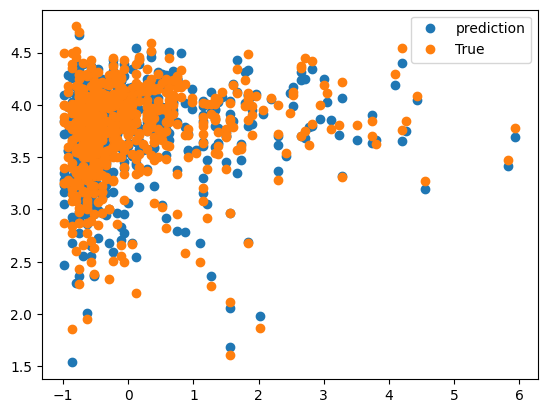

In [714]:
fig, ax = plt.subplots()
#ax.plot(X_train["ABV"], y_train, "o", label="Data")
ax.plot(X_test["Alcohol"], ynewpred, "o", label="prediction")

ax.plot(X_test["Alcohol"], y_test, "o", label="True")
#ax.plot(np.hstack((X_train, X_test)), np.hstack((res.predict(X_train), ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")